### Type 0 is safe, Type 0 is can be dangerous

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np

In [2]:
dF = pd.read_excel("maliciousornot.xlsx")

In [3]:
dF

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dF.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
dF.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot:xlabel='Type', ylabel='count'>

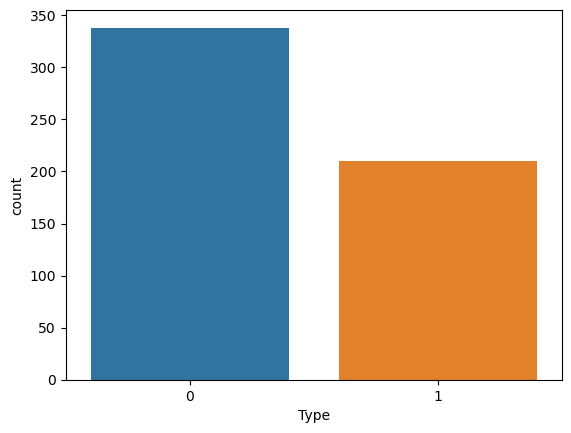

In [7]:
sbn.countplot(x = "Type", data = dF)

<AxesSubplot:>

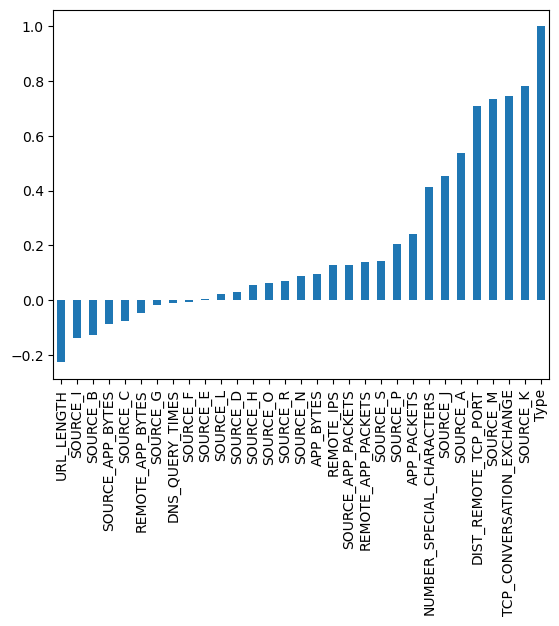

In [8]:
dF.corr()["Type"].sort_values().plot(kind = "bar")

In [9]:
y = dF["Type"].values
x = dF.drop("Type", axis = 1).values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(383, 30)

In [16]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [17]:
model.fit(x = X_train, y = y_train, epochs = 700, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/700
12/12 [==============================] - 1s 22ms/step - loss: 0.6792 - val_loss: 0.6956
Epoch 2/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6629 - val_loss: 0.6851
Epoch 3/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6465 - val_loss: 0.6734
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6288 - val_loss: 0.6630
Epoch 5/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6107 - val_loss: 0.6528
Epoch 6/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5883 - val_loss: 0.6338
Epoch 7/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5632 - val_loss: 0.6134
Epoch 8/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5340 - val_loss: 0.5899
Epoch 9/700
12/12 [==============================] - 0s 7ms/step - loss: 0.4988 - val_loss: 0.5575
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4594 - val_loss: 0.5232
Epoch 11

12/12 [==============================] - 0s 6ms/step - loss: 0.0489 - val_loss: 0.2568
Epoch 84/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0489 - val_loss: 0.2541
Epoch 85/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0468 - val_loss: 0.2567
Epoch 86/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0475 - val_loss: 0.2564
Epoch 87/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0478 - val_loss: 0.2502
Epoch 88/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0483 - val_loss: 0.2521
Epoch 89/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.2564
Epoch 90/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0450 - val_loss: 0.2598
Epoch 91/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0457 - val_loss: 0.2563
Epoch 92/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.2629
Epoch 93/700


12/12 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.2393
Epoch 165/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.2482
Epoch 166/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.2471
Epoch 167/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.2412
Epoch 168/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.2465
Epoch 169/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.2462
Epoch 170/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0197 - val_loss: 0.2502
Epoch 171/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.2426
Epoch 172/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.2443
Epoch 173/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.2447
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.2721
Epoch 246/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.2745
Epoch 247/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.2715
Epoch 248/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.2745
Epoch 249/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.2755
Epoch 250/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2770
Epoch 251/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2781
Epoch 252/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2784
Epoch 253/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.2848
Epoch 254/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.2830
Epoc

12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.2960
Epoch 327/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.2961
Epoch 328/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.2970
Epoch 329/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.2951
Epoch 330/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.2964
Epoch 331/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.3000
Epoch 332/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.3004
Epoch 333/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.3048
Epoch 334/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.2992
Epoch 335/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.2994
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 5.1670e-04 - val_loss: 0.3280
Epoch 406/700
12/12 [==============================] - 0s 6ms/step - loss: 5.2132e-04 - val_loss: 0.3320
Epoch 407/700
12/12 [==============================] - 0s 6ms/step - loss: 5.5701e-04 - val_loss: 0.3284
Epoch 408/700
12/12 [==============================] - 0s 5ms/step - loss: 5.2590e-04 - val_loss: 0.3338
Epoch 409/700
12/12 [==============================] - 0s 5ms/step - loss: 4.8794e-04 - val_loss: 0.3331
Epoch 410/700
12/12 [==============================] - 0s 5ms/step - loss: 4.8741e-04 - val_loss: 0.3327
Epoch 411/700
12/12 [==============================] - 0s 5ms/step - loss: 4.9255e-04 - val_loss: 0.3322
Epoch 412/700
12/12 [==============================] - 0s 6ms/step - loss: 4.7474e-04 - val_loss: 0.3330
Epoch 413/700
12/12 [==============================] - 0s 5ms/step - loss: 4.7062e-04 - val_loss: 0.3335
Epoch 414/700
12/12 [==============================] - 0s 5ms/step - 

12/12 [==============================] - 0s 5ms/step - loss: 2.3077e-04 - val_loss: 0.3650
Epoch 484/700
12/12 [==============================] - 0s 5ms/step - loss: 2.3182e-04 - val_loss: 0.3636
Epoch 485/700
12/12 [==============================] - 0s 5ms/step - loss: 2.4177e-04 - val_loss: 0.3642
Epoch 486/700
12/12 [==============================] - 0s 6ms/step - loss: 2.2373e-04 - val_loss: 0.3648
Epoch 487/700
12/12 [==============================] - 0s 6ms/step - loss: 2.2680e-04 - val_loss: 0.3635
Epoch 488/700
12/12 [==============================] - 0s 6ms/step - loss: 2.2006e-04 - val_loss: 0.3646
Epoch 489/700
12/12 [==============================] - 0s 6ms/step - loss: 2.2191e-04 - val_loss: 0.3677
Epoch 490/700
12/12 [==============================] - 0s 5ms/step - loss: 2.2936e-04 - val_loss: 0.3680
Epoch 491/700
12/12 [==============================] - 0s 6ms/step - loss: 2.1438e-04 - val_loss: 0.3695
Epoch 492/700
12/12 [==============================] - 0s 6ms/step - 

12/12 [==============================] - 0s 5ms/step - loss: 1.2378e-04 - val_loss: 0.4043
Epoch 562/700
12/12 [==============================] - 0s 5ms/step - loss: 1.2039e-04 - val_loss: 0.4085
Epoch 563/700
12/12 [==============================] - 0s 5ms/step - loss: 1.1179e-04 - val_loss: 0.4045
Epoch 564/700
12/12 [==============================] - 0s 5ms/step - loss: 1.1178e-04 - val_loss: 0.4056
Epoch 565/700
12/12 [==============================] - 0s 5ms/step - loss: 1.1236e-04 - val_loss: 0.4090
Epoch 566/700
12/12 [==============================] - 0s 5ms/step - loss: 1.0852e-04 - val_loss: 0.4065
Epoch 567/700
12/12 [==============================] - 0s 6ms/step - loss: 1.1275e-04 - val_loss: 0.4074
Epoch 568/700
12/12 [==============================] - 0s 6ms/step - loss: 1.1216e-04 - val_loss: 0.4120
Epoch 569/700
12/12 [==============================] - 0s 6ms/step - loss: 1.0621e-04 - val_loss: 0.4095
Epoch 570/700
12/12 [==============================] - 0s 6ms/step - 

12/12 [==============================] - 0s 6ms/step - loss: 6.0819e-05 - val_loss: 0.4536
Epoch 640/700
12/12 [==============================] - 0s 6ms/step - loss: 6.0249e-05 - val_loss: 0.4500
Epoch 641/700
12/12 [==============================] - 0s 7ms/step - loss: 6.1211e-05 - val_loss: 0.4518
Epoch 642/700
12/12 [==============================] - 0s 6ms/step - loss: 6.0463e-05 - val_loss: 0.4518
Epoch 643/700
12/12 [==============================] - 0s 6ms/step - loss: 5.7936e-05 - val_loss: 0.4524
Epoch 644/700
12/12 [==============================] - 0s 6ms/step - loss: 5.8140e-05 - val_loss: 0.4524
Epoch 645/700
12/12 [==============================] - 0s 6ms/step - loss: 5.8889e-05 - val_loss: 0.4512
Epoch 646/700
12/12 [==============================] - 0s 6ms/step - loss: 6.1931e-05 - val_loss: 0.4505
Epoch 647/700
12/12 [==============================] - 0s 6ms/step - loss: 5.4309e-05 - val_loss: 0.4579
Epoch 648/700
12/12 [==============================] - 0s 6ms/step - 

In [18]:
model.history.history

{'loss': [0.6791566014289856,
  0.6628881096839905,
  0.6465074419975281,
  0.6287544369697571,
  0.6107313632965088,
  0.5882616639137268,
  0.5632071495056152,
  0.5340076684951782,
  0.49877503514289856,
  0.4594224691390991,
  0.4166145920753479,
  0.3703535199165344,
  0.32989439368247986,
  0.28814464807510376,
  0.2544625997543335,
  0.22475901246070862,
  0.2016827017068863,
  0.18324753642082214,
  0.16966702044010162,
  0.15966741740703583,
  0.14842727780342102,
  0.14148347079753876,
  0.13325771689414978,
  0.1307927519083023,
  0.12373562902212143,
  0.11742135882377625,
  0.11356144398450851,
  0.11233126372098923,
  0.11355135589838028,
  0.10625547170639038,
  0.10564650595188141,
  0.10255580395460129,
  0.10083454847335815,
  0.09373384714126587,
  0.09223827719688416,
  0.09314103424549103,
  0.09888201951980591,
  0.10061647742986679,
  0.08720283210277557,
  0.08308995515108109,
  0.08264024555683136,
  0.08152829110622406,
  0.0796860009431839,
  0.07841137051582

In [19]:
lossModel = pd.DataFrame(model.history.history)

<AxesSubplot:>

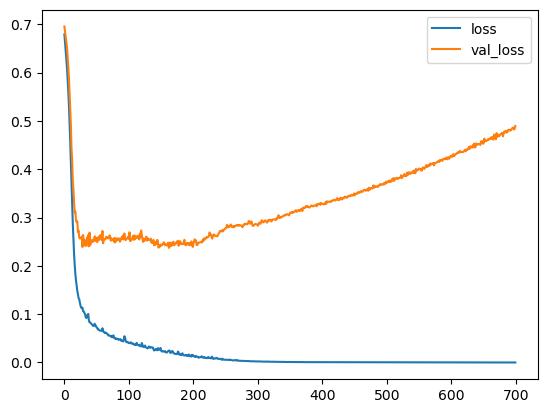

In [20]:
lossModel.plot() # Show the overfitting

In [21]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [22]:
earStop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [23]:
model.fit(x = X_train, y = y_train, epochs = 700, validation_data = (X_test, y_test), verbose = 1, callbacks = [earStop])

Epoch 1/700
12/12 [==============================] - 1s 20ms/step - loss: 0.6927 - val_loss: 0.6807
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6668 - val_loss: 0.6697
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6403 - val_loss: 0.6568
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6136 - val_loss: 0.6412
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5783 - val_loss: 0.6106
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5373 - val_loss: 0.5805
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4879 - val_loss: 0.5271
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4326 - val_loss: 0.4929
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3792 - val_loss: 0.4472
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3331 - val_loss: 0.4189
Epoch 11

In [24]:
eLossModel = pd.DataFrame(model.history.history)

<AxesSubplot:>

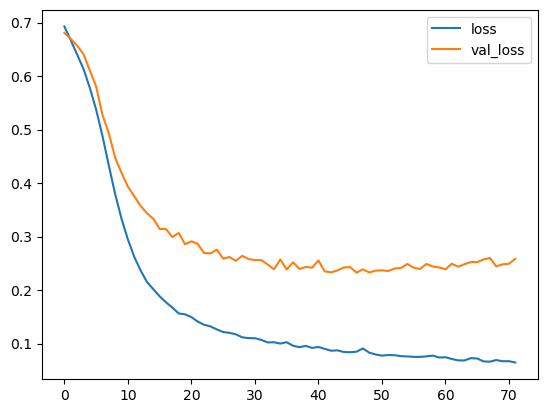

In [25]:
eLossModel.plot()

In [26]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.6)) # 0.5 dropout rate is more appropriate

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [27]:
model.fit(x = X_train, y = y_train, epochs = 700, validation_data = (X_test, y_test), verbose = 1, callbacks = [earStop])

Epoch 1/700
12/12 [==============================] - 1s 17ms/step - loss: 0.7287 - val_loss: 0.6899
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.7101 - val_loss: 0.6870
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6866 - val_loss: 0.6852
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6920 - val_loss: 0.6835
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6781 - val_loss: 0.6822
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6707 - val_loss: 0.6809
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6742 - val_loss: 0.6791
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6683 - val_loss: 0.6783
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6650 - val_loss: 0.6770
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6570 - val_loss: 0.6761
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 0.2886 - val_loss: 0.2994
Epoch 84/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2806 - val_loss: 0.2972
Epoch 85/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2602 - val_loss: 0.2962
Epoch 86/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2618 - val_loss: 0.2956
Epoch 87/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3079 - val_loss: 0.2989
Epoch 88/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2755 - val_loss: 0.2991
Epoch 89/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2325 - val_loss: 0.2950
Epoch 90/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2880 - val_loss: 0.2932
Epoch 91/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2992 - val_loss: 0.2937
Epoch 92/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2455 - val_loss: 0.2970
Epoch 93/700


12/12 [==============================] - 0s 9ms/step - loss: 0.1694 - val_loss: 0.2824
Epoch 165/700
12/12 [==============================] - 0s 7ms/step - loss: 0.1878 - val_loss: 0.2880
Epoch 166/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2122 - val_loss: 0.2889
Epoch 167/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2620 - val_loss: 0.2867
Epoch 168/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1894 - val_loss: 0.2857
Epoch 169/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2203 - val_loss: 0.2802
Epoch 170/700
12/12 [==============================] - 0s 5ms/step - loss: 0.1539 - val_loss: 0.2827
Epoch 171/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1698 - val_loss: 0.2870
Epoch 172/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1655 - val_loss: 0.2894
Epoch 173/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1816 - val_loss: 0.2941
Epoc

In [28]:
dLossModel = pd.DataFrame(model.history.history)

<AxesSubplot:>

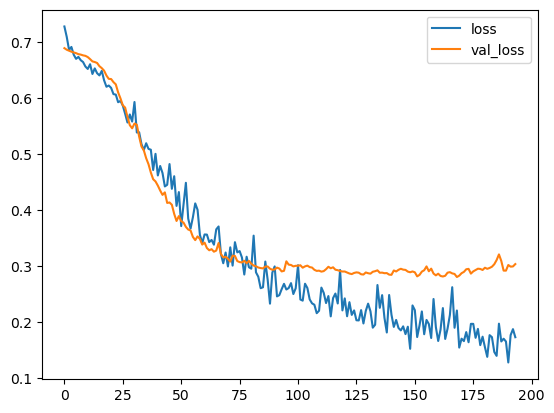

In [29]:
dLossModel.plot()

In [30]:
predict_x = model.predict(X_test) 
drPredictions = np.argmax(predict_x, axis = 1)

6/6 [==============================] - 0s 3ms/step


In [31]:
drPredictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_test, drPredictions))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(confusion_matrix(y_test, drPredictions))

[[91  0]
 [74  0]]
